In [1]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS
!pip3 install SimpSOM

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-otjtem0z
  Running command git clone -q https://github.com/PYFTS/pyFTS /tmp/pip-req-build-otjtem0z
  Created wheel for pyFTS: filename=pyFTS-1.6-cp37-none-any.whl size=215479 sha256=07449e8bd000e87ba36fb96362a4ed45f57256e0220b6ed67a0ca57eca9f7034
  Stored in directory: /tmp/pip-ephem-wheel-cache-lv7zda75/wheels/e7/32/a9/230470113df5a73242a5a6d05671cb646db97abf14bbce2644
Successfully built pyFTS
  Created wheel for SimpSOM: filename=SimpSOM-1.3.4-cp37-none-any.whl size=17086 sha256=36d46b52066d71243299baab162db2190176ba4a95439ab652f0e2e135aea6f0
  Stored in directory: /root/.cache/pip/wheels/51/76/ee/c02f0bc20af4cd8f46ee4142ebf7bb654b737d6d8f2360d26b
Successfully built SimpSOM


In [2]:
import pandas as pd
import warnings
import matplotlib.pylab as plt
from pyFTS.partitioners import Grid
from pyFTS.common import FLR
from pyFTS.models import chen
#warnings.filterwarnings('ignore')
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
df = pd.read_csv('/content/covid-19.csv')
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [4]:
#Aggregate according to countries
countries_data = pd.pivot_table(df, values='New_cases', index=['Date_reported'],columns=['Country'], aggfunc=np.sum, fill_value=0)
data = countries_data


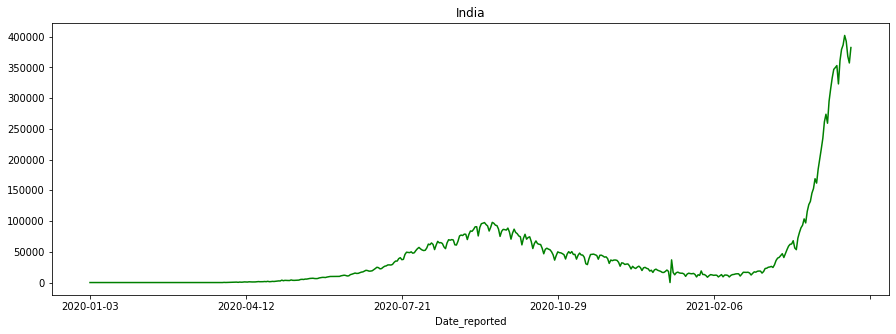

In [5]:
data["India"].plot(figsize=(15,5), color=["green"], title='India')
plt.show()

In [6]:
data = data["India"].values


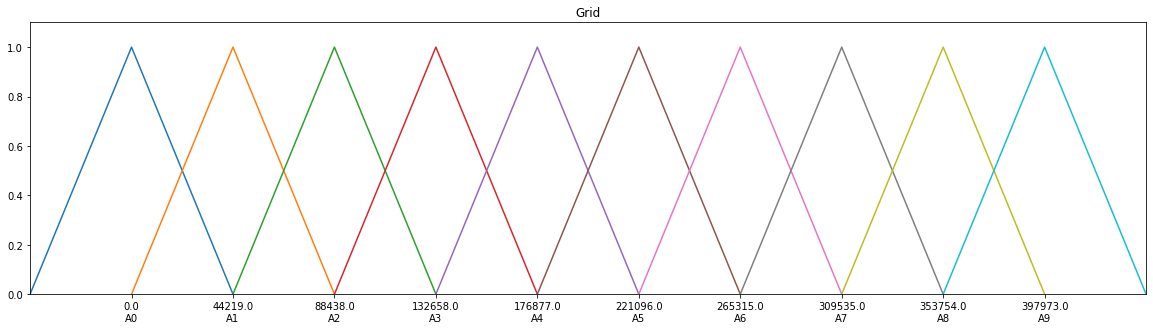

In [17]:
fz = Grid.GridPartitioner(data=data,npart=10)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[20,5])
fz.plot(ax)

In [12]:
countries_death_data = pd.pivot_table(df, values='New_deaths', index=['Date_reported'],columns=['Country'], aggfunc=np.sum, fill_value=0)
data_death = countries_death_data

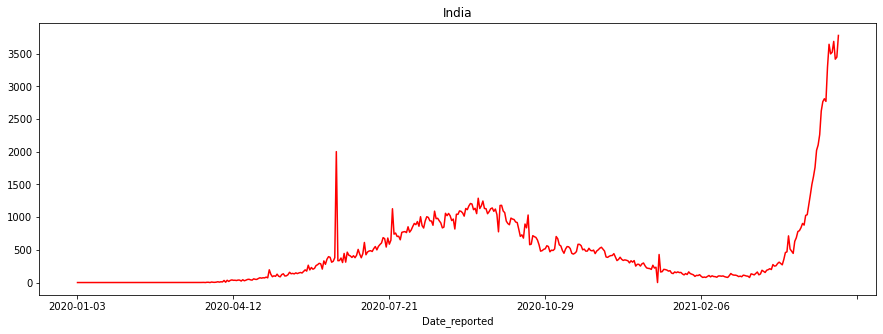

In [13]:
data_death["India"].plot(figsize=(15,5), color=["red"], title='India')
plt.show()

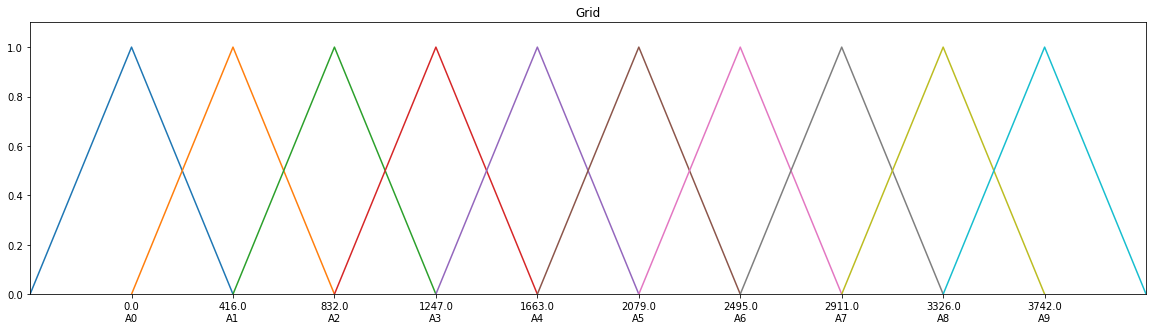

In [14]:
data_death = data_death["India"].values
fz1 = Grid.GridPartitioner(data=data_death,npart=10)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[20,5])
fz1.plot(ax)

In [18]:
fuzzyfied_data = fz.fuzzyfy(data, method='maximum', mode='sets')
patterns = FLR.generate_non_recurrent_flrs(fuzzyfied_data)
patt_list = []
for k in patterns:
  patt_list.append(str(k))

print(patt_list)

['A0 -> A0', 'A0 -> A1', 'A1 -> A1', 'A1 -> A2', 'A2 -> A1', 'A2 -> A2', 'A1 -> A0', 'A2 -> A3', 'A3 -> A3', 'A3 -> A4', 'A4 -> A4', 'A4 -> A5', 'A5 -> A5', 'A5 -> A6', 'A6 -> A6', 'A6 -> A7', 'A7 -> A7', 'A7 -> A8', 'A8 -> A8', 'A8 -> A7', 'A8 -> A9', 'A9 -> A9', 'A9 -> A8']


In [19]:
fuzzyfied_data_death = fz1.fuzzyfy(data_death, method='maximum', mode='sets')
patterns_death = FLR.generate_non_recurrent_flrs(fuzzyfied_data_death)
patt_list_death = []
for k in patterns_death:
  patt_list_death.append(str(k))

print(patt_list_death)

['A0 -> A0', 'A0 -> A1', 'A1 -> A0', 'A1 -> A1', 'A1 -> A5', 'A5 -> A1', 'A1 -> A2', 'A2 -> A2', 'A2 -> A1', 'A2 -> A3', 'A3 -> A2', 'A3 -> A3', 'A3 -> A4', 'A4 -> A4', 'A4 -> A5', 'A5 -> A5', 'A5 -> A6', 'A6 -> A7', 'A7 -> A7', 'A7 -> A8', 'A8 -> A9', 'A9 -> A8', 'A8 -> A8']


In [21]:
model_FTS = chen.ConventionalFTS(partitioner=fz)
model_FTS.fit(data)
forecasts_FTS = model_FTS.predict(data)
forecasts_FTS.insert(0,None)
print(model_FTS)


Conventional FTS:
A0 -> A0,A1
A1 -> A0,A1,A2
A2 -> A1,A2,A3
A3 -> A3,A4
A4 -> A4,A5
A5 -> A5,A6
A6 -> A6,A7
A7 -> A7,A8
A8 -> A7,A8,A9
A9 -> A8,A9



In [22]:
model_FTS_death = chen.ConventionalFTS(partitioner=fz1)
model_FTS_death.fit(data_death)
forecasts_FTS_death = model_FTS_death.predict(data_death)
forecasts_FTS_death.insert(0,None)
print(model_FTS_death)


Conventional FTS:
A0 -> A0,A1
A1 -> A0,A1,A2,A5
A2 -> A1,A2,A3
A3 -> A2,A3,A4
A5 -> A1,A5,A6
A4 -> A4,A5
A6 -> A7
A7 -> A7,A8
A9 -> A8
A8 -> A8,A9



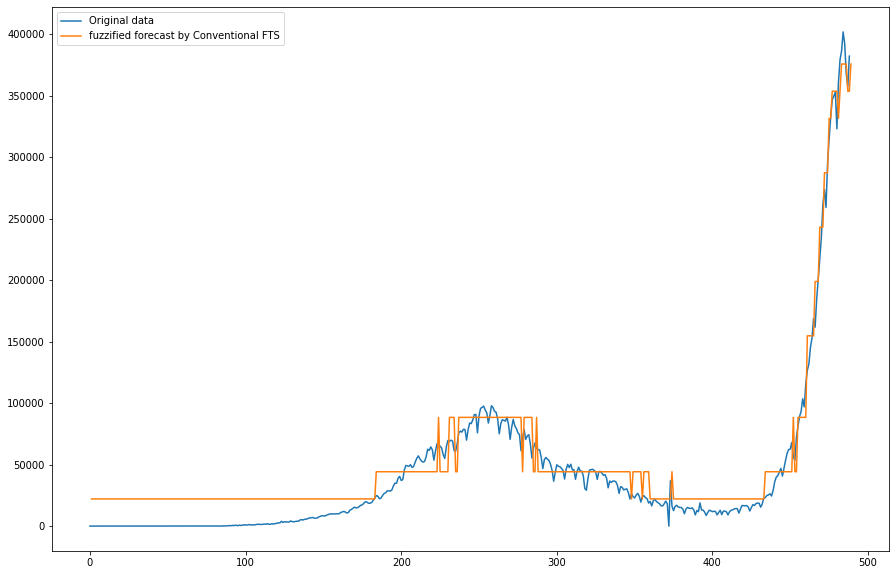

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,10])
original_data, = plot(data, label="Original data")
predicted_data, = plot(forecasts_FTS, label="fuzzified forecast by Conventional FTS")

legend(handles=[original_data, predicted_data])

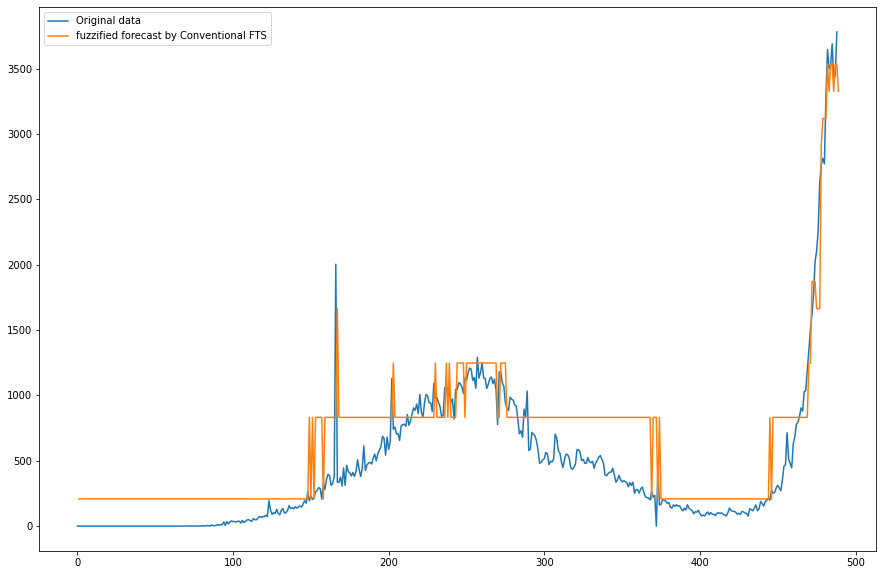

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,10])
original_data_death, = plot(data_death, label="Original data")
predicted_data_death, = plot(forecasts_FTS_death, label="fuzzified forecast by Conventional FTS")

legend(handles=[original_data_death, predicted_data_death])